In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e4/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e4/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e4/sample_submission.csv")

In [4]:
train_data.sample(5)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
457543,457543,Laugh Line,Episode 30,46.83,Comedy,64.92,Thursday,Night,45.77,2.0,Neutral,28.52300
419609,419609,Finance Focus,Episode 66,6.71,Business,67.58,Sunday,Evening,NaN,2.0,Negative,0.00000
195775,195775,Tech Talks,Episode 60,103.98,Technology,78.75,Monday,Afternoon,47.56,0.0,Neutral,44.09746
475672,475672,Business Briefs,Episode 24,100.87,Business,24.16,Wednesday,Evening,81.38,3.0,Positive,62.36329
163914,163914,Tech Talks,Episode 85,60.40,Technology,86.19,Tuesday,Morning,58.01,0.0,Negative,39.84000


In [5]:
train_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [6]:
train_data.shape

(750000, 12)

In [7]:
test_data.shape

(250000, 11)

In [8]:
test_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

## Missing data analysis 

In [9]:
missing_values_train = pd.DataFrame({"Features" : train_data.columns,
                                    "[Train] No of missing data": train_data.isnull().sum().values,
                                    "[Train] % of missing data": (train_data.isnull().sum().values/len(train_data))*100})
missing_values_test = pd.DataFrame({"Features" : test_data.columns,
                                   "[Test] No of missing data" : test_data.isnull().sum().values,
                                   "[Test] % of missing data" : (test_data.isnull().sum().values/len(test_data))*100})
unique_values_train = pd.DataFrame({"Features" : train_data.columns,
                                   "[Train] No of unique": train_data.nunique().values})
unique_values_test = pd.DataFrame({"Features" : test_data.columns,
                                   "[Test] No of unique": test_data.nunique().values})

feature_type = pd.DataFrame({"Features": train_data.columns, 
                            "Type": train_data.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on="Features", how="left")
merged_df = pd.merge(merged_df, unique_values_train, on="Features", how="left")
merged_df = pd.merge(merged_df, unique_values_test, on="Features", how="left")
merged_df = pd.merge(merged_df, feature_type, on="Features", how="left")
merged_df

,Features,[Train] No of missing data,[Train] % of missing data,[Test] No of missing data,[Test] % of missing data,[Train] No of unique,[Test] No of unique,Type
0,id,0,0.000000,0.0,0.0000,750000,250000.0,int64
1,Podcast_Name,0,0.000000,0.0,0.0000,48,48.0,object
2,Episode_Title,0,0.000000,0.0,0.0000,100,100.0,object
3,Episode_Length_minutes,87093,11.612400,28736.0,11.4944,12268,11631.0,float64
4,Genre,0,0.000000,0.0,0.0000,10,10.0,object
5,Host_Popularity_percentage,0,0.000000,0.0,0.0000,8038,8010.0,float64
6,Publication_Day,0,0.000000,0.0,0.0000,7,7.0,object
7,Publication_Time,0,0.000000,0.0,0.0000,4,4.0,object
8,Guest_Popularity_percentage,146030,19.470667,48832.0,19.5328,10019,9961.0,float64
9,Number_of_Ads,1,0.000133,0.0,0.0000,12,6.0,float64


In [10]:
train_duplicates = train_data.duplicated().sum()

test_duplicates = train_data.duplicated().sum()

print(f"Number of duplicate row in train_data : {train_duplicates}")
print(f"Number of duplicate row in test_data : {test_duplicates}")

Number of duplicate row in train_data : 0
Number of duplicate row in test_data : 0


In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [12]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,419.298741,166854.502468,2.47,35.78,63.97,94.15,78486264.00
Host_Popularity_percentage,250000.0,59.716491,22.880028,2.49,39.25,59.90,79.39,117.76
Guest_Popularity_percentage,201168.0,52.192796,28.445034,0.00,28.32,53.36,76.56,116.82
Number_of_Ads,250000.0,1.355852,4.274399,0.00,0.00,1.00,2.00,2063.00


### Data Observstion 

#### Datast shape
Train data : 750000 x 12 [row x columns] Test data : 250000 x 11 [row x columns]

#### Missing value analysis

Episode_Length_minutes : Both train and test has more than 11% missing data.

Guest_Popularity_percentage: Both train has test has more than 19% misiing data. 

Number_of_Ads : There is one missing data point in train. 

**Next Action Item** : 

* *Number of ads* : Use mean or median imputation to handle missing values
* *Episode_Length_minutes* :  missing imputation. Thre could be a better ways than using mean/median as there are only 48 podcast names. We could use mean at `podcast name` or could use rolling mean by grouping `episode title`
* *Guest_Popularity_percentage* : Use mean or median imputation to handle missing data. Analyse more if we could find any trends to find Guest popularity

#### Key observation of data

* ID : A unique identified for each record
* Podcast_Name : There are only 48 unique podcast. This could be treated as categorical data.
* Episode_Title : There are only 100 unique episode title. This could also treated as categorical data.
* Episode_Length_minutes : Eposide length. This could be use to clip prediction into a range. Test max value is `78486264.00`. This look like a noise. 
* Genre : There are 10 genre and is categorical data.
* Host_Popularity_percentage : Repersents popularity of host. This could play a crucial feature for `Listening_Time_minutes` prediction.
* Publication_Day : 7 days of a week. This will be used to extract feature like `Weekend`, `weekday` etc
* Publication_Time : It is a categorical feature which splits time of days into segment.
* Guest_Popularity_percentage : Repersents popularity of Guest. This could play a crucial feature for `Listening_Time_minutes` prediction. Some interaction feature copuld be created with `Host_Popularity_percentage` as both could influence high or low stream of podcast.
* Number_of_Ads : Train has 12 and Test has only 6 unique values. Looks like categorical data but it varies alot. Max value is 103.91. This need some cleanup. Interaction feesture could be created with `Episode_Length_minutes`
* Episode_Sentiment : Sentiment of episode
* Listening_Time_minutes : Target numerical value

#### Key Takeaway

* Test dataset has some noise. Which needs to be taken care.
* Episode_Length_minutes, Guest_Popularity_percentage needs clever imputation with `Podcast_Name` and `Episode_Title`
* Integraction feature possible with Host_Popularity_percentage, Guest_Popularity_percentage, Number_of_Ads, Episode_Length_minutes
* Feature extraction from categorical feature - Publication_Day, Publication_Time, Number_of_Ads
* Possibilities of feature extraction from text could be explored with concatination of Podcast_Name, Episode_Title

## EDA

In [13]:
train_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [14]:
numerical_variables = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage']
categorial_valiable = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment'] 
target_variable = 'Listening_Time_minutes'

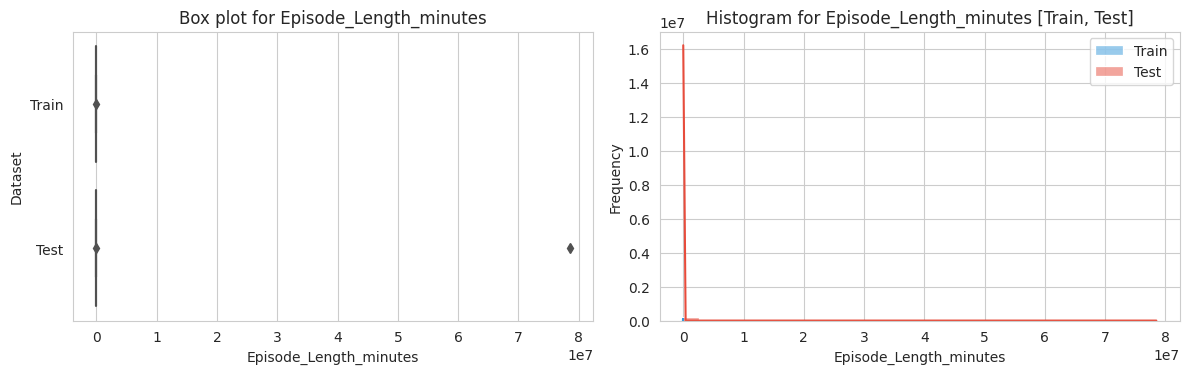

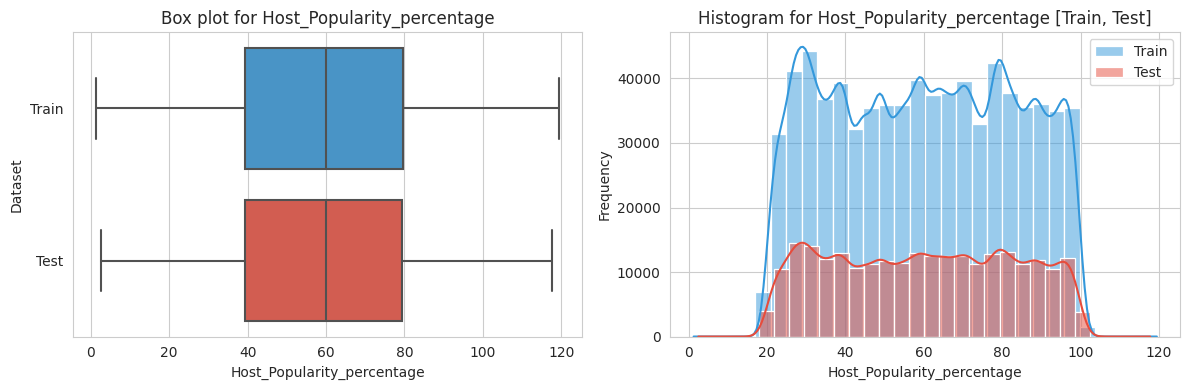

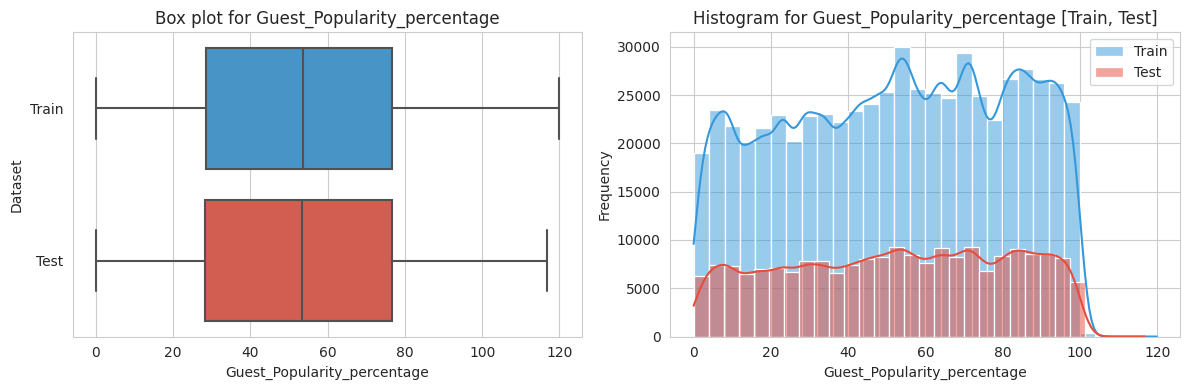

In [15]:
custom_palette = ['#3498db', '#e74c3c']

def create_varibale_plot(variable, include_test=True):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1,2, figsize=(12,4))

    # Box plot
    plt.subplot(1,2,1)
    if include_test:
        sns.boxplot(data=pd.concat([train_data, test_data]), x=variable, y='Dataset', palette=custom_palette)
    else:
        sns.boxplot(data=train_data, x=variable, y='Dataset', palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box plot for {variable}")

    # Separate histogram 
    plt.subplot(1,2,2)
    sns.histplot(data=train_data, x= variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    if include_test:
        sns.histplot(data=test_data, x= variable, color=custom_palette[1], kde=True, bins=30, label="Test")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    if include_test:
        plt.title(f"Histogram for {variable} [Train, Test]")
    else:
        plt.title(f"Histogram for {variable} [Train]")
    plt.legend()

    # Adjusting spacing between subplots 
    plt.tight_layout()
    plt.show()


train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

variables = [col for col in train_data.columns if col in numerical_variables]

for variable in variables :
    create_varibale_plot(variable)

train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)

### Test dataset noise handling

In [16]:
print(len(train_data[train_data["Episode_Length_minutes"]>150]))
print(len(test_data[test_data["Episode_Length_minutes"]>150]))

1
2


In [17]:
train_data[train_data["Episode_Length_minutes"]>150]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
101637,101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.0,Positive,64.31981


In [18]:
test_data[test_data["Episode_Length_minutes"]>150]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
54434,804434,Current Affairs,Episode 36,7575.0,News,89.54,Saturday,Night,NaN,2.0,Negative
56597,806597,Market Masters,Episode 23,78486264.0,Business,55.45,Monday,Evening,48.5,0.0,Positive


In [19]:
test_data.loc[test_data["Episode_Length_minutes"]>150, "Episode_Length_minutes"] = 325

In [20]:
print(len(train_data[train_data["Episode_Length_minutes"]>150]))
print(len(test_data[test_data["Episode_Length_minutes"]>150]))

1
2


In [21]:
train_data[train_data["Episode_Length_minutes"]>150]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
101637,101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.0,Positive,64.31981


In [22]:
print(len(train_data[train_data["Episode_Length_minutes"]>150]))
print(len(test_data[test_data["Episode_Length_minutes"]>150]))

1
2


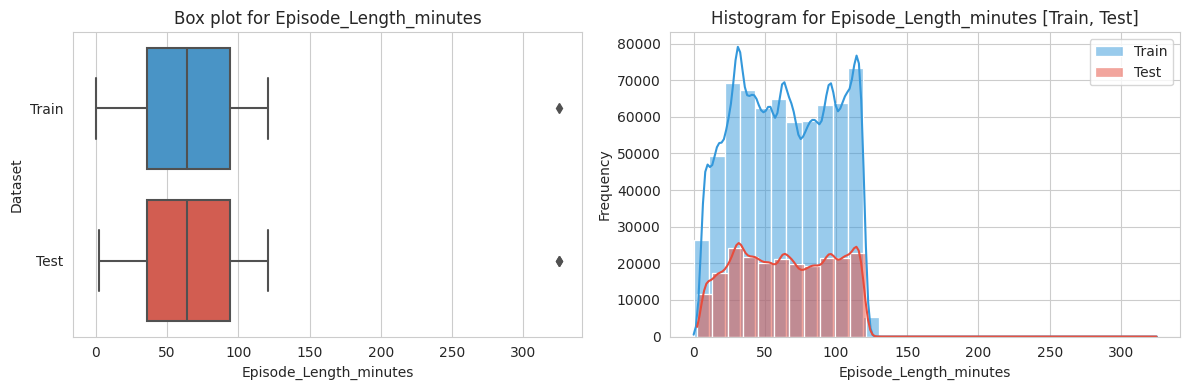

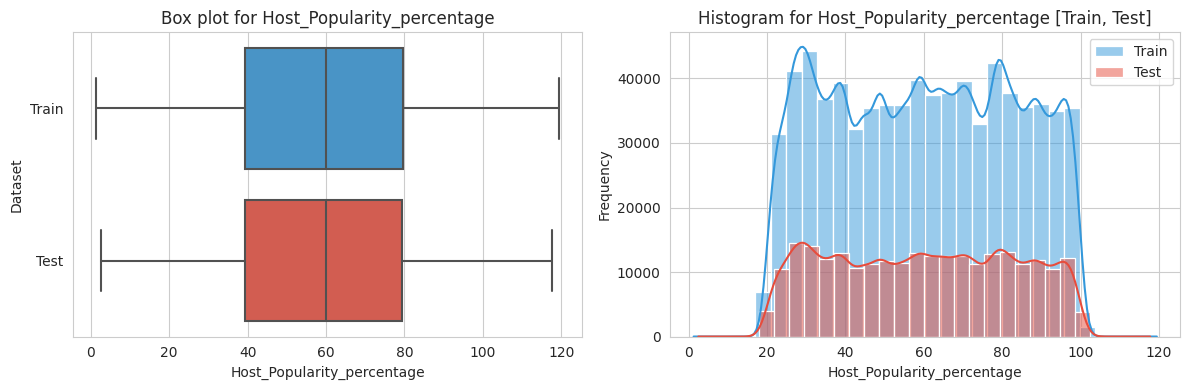

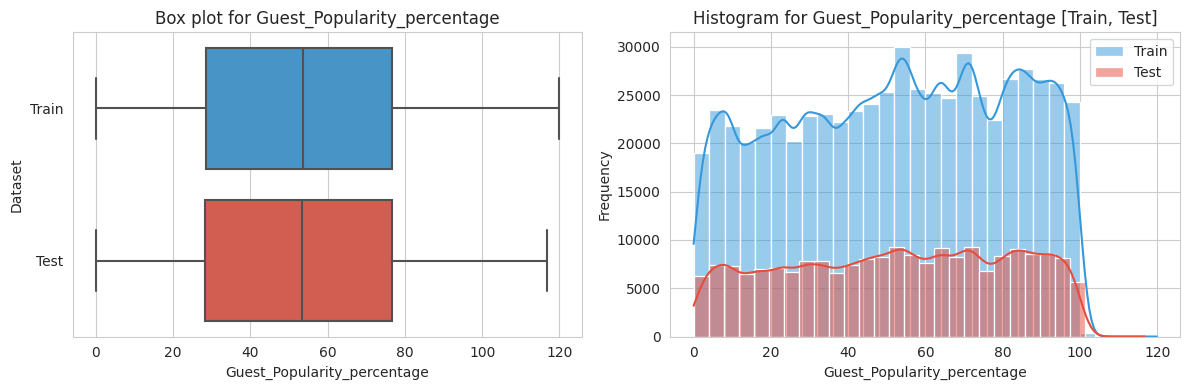

In [23]:
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

variables = [col for col in train_data.columns if col in numerical_variables]

for variable in variables :
    create_varibale_plot(variable)

train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)

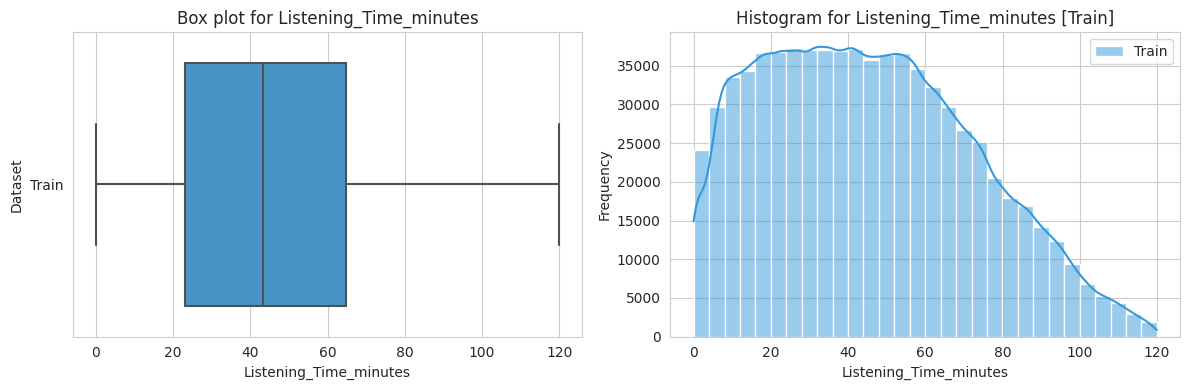

In [24]:
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

variables = ["Listening_Time_minutes"]

for variable in variables :
    create_varibale_plot(variable, include_test=False)

train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)

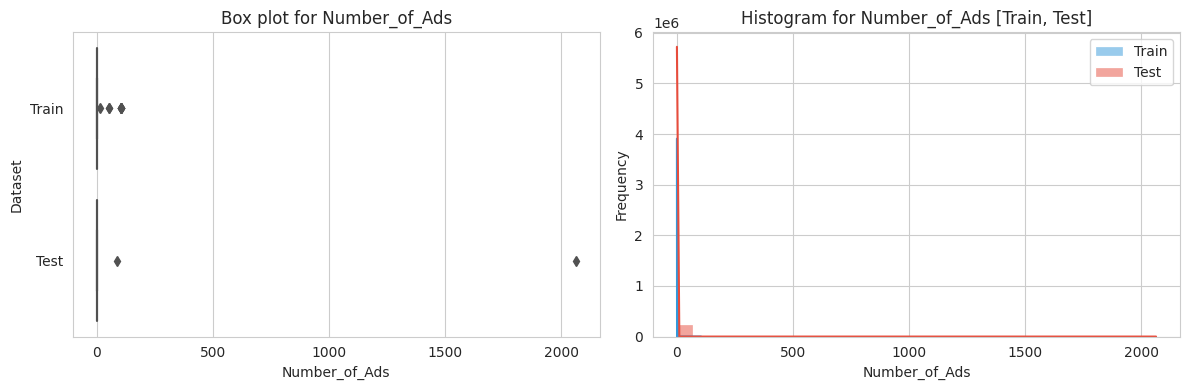

In [25]:
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

variables = ["Number_of_Ads"]

for variable in variables :
    create_varibale_plot(variable)

train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)

## Bivariate Analysis

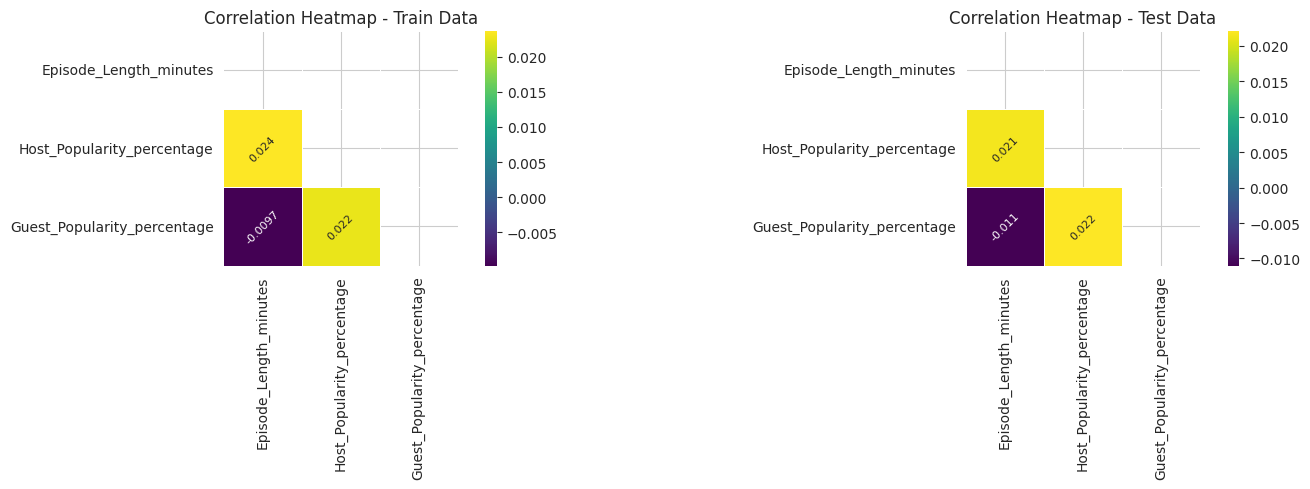

In [26]:
variables = [col for col in train_data.columns if col in numerical_variables]

# Adding variables to the existing list
train_variables = variables 
test_variables = variables

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1000x600 with 0 Axes>

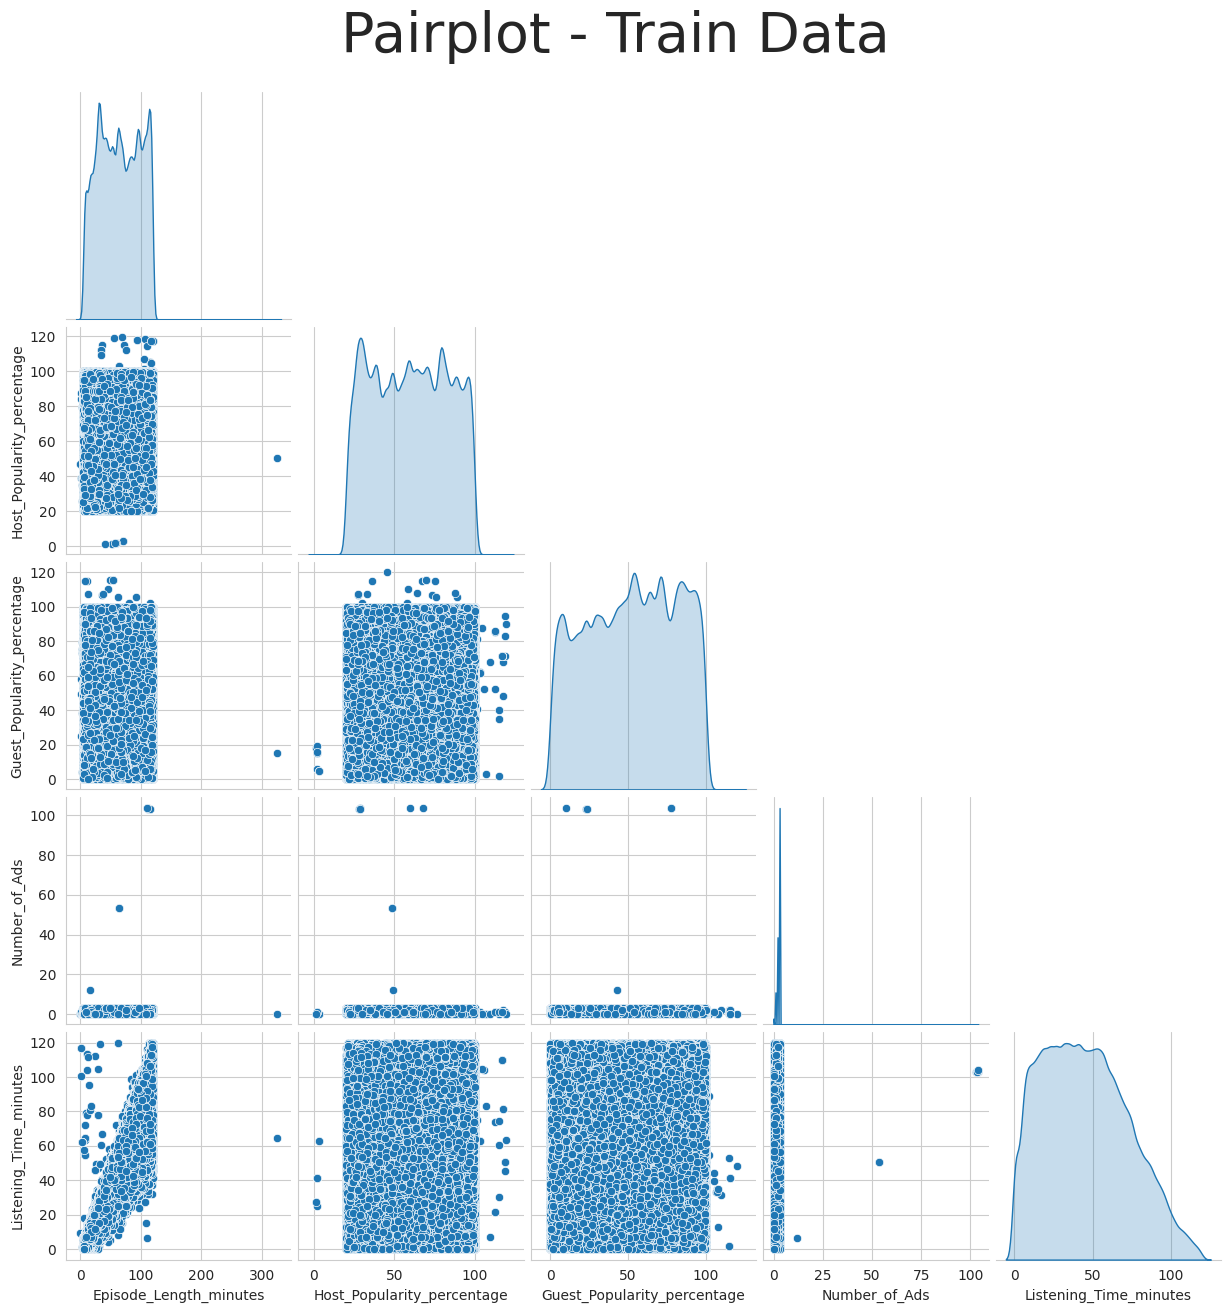

<Figure size 1000x600 with 0 Axes>

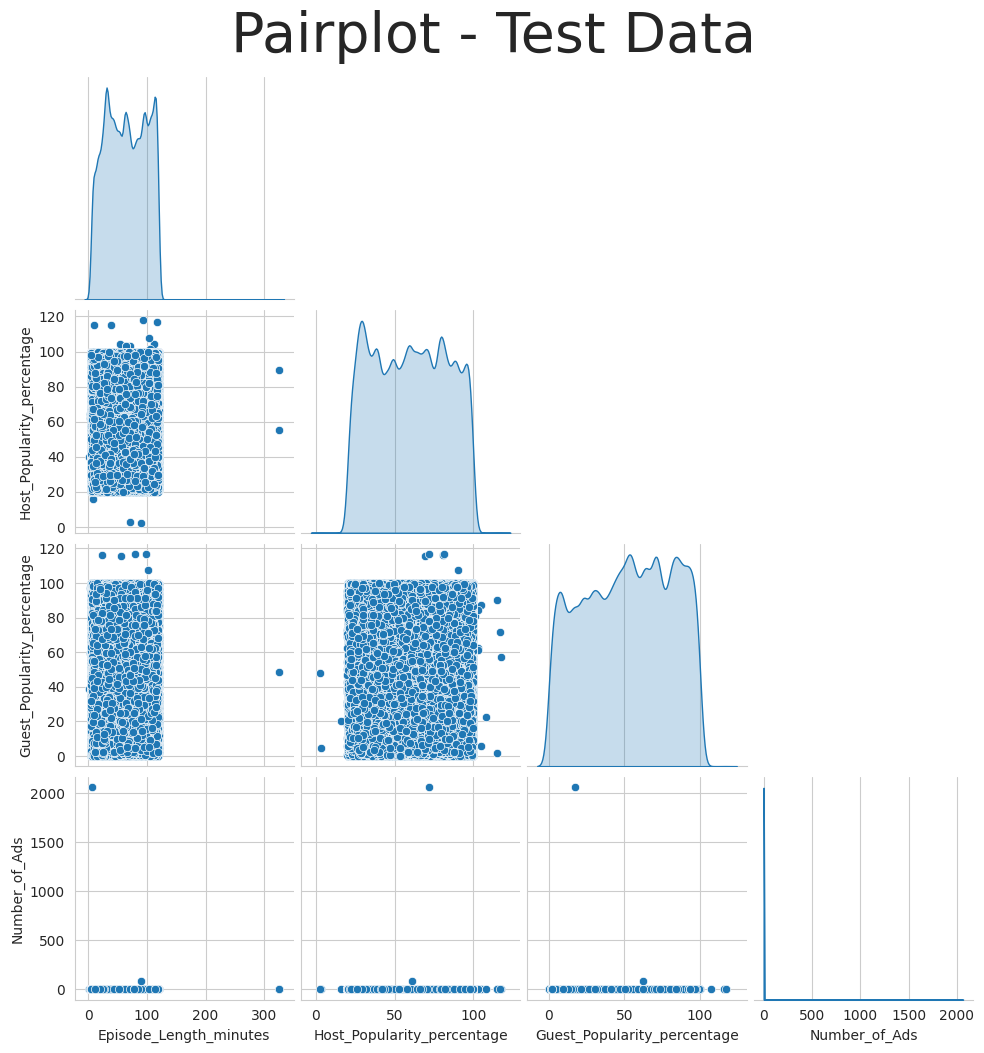

In [27]:
# Generate pairplot for train_data
plt.figure(figsize=(10, 6))
sns.pairplot(train_data.drop(columns=['id'], errors='ignore'), diag_kind="kde", corner=True)
plt.suptitle("Pairplot - Train Data", fontsize=40, y=1.05)
plt.show()

# Generate pairplot for test_data
plt.figure(figsize=(10, 6))
sns.pairplot(test_data.drop(columns=['id'], errors='ignore'), diag_kind="kde", corner=True)
plt.suptitle("Pairplot - Test Data", fontsize=40, y=1.05)
plt.show()

#### Observation

* None of numerical features are corelated.
* Train and test both has outlier. We need proper handling of outlier 

# Categorical feature analysis 

In [28]:
# Group by the categorical feature and calculate stats for the numerical target

for col in categorial_valiable:
    summary_stats = train_data.groupby(col)[target_variable].agg(['mean', 'median', 'std', 'count', 'min', 'max'])
    # Display the results, sorted by mean for easier comparison
    print(summary_stats.sort_values(by='mean', ascending=False))

                          mean     median        std  count  min     max
Podcast_Name                                                            
Melody Mix           48.105553  46.926210  27.717263  18889  0.0  119.97
Money Matters        47.883883  45.937740  27.563590  13380  0.0  119.22
Crime Chronicles     47.678948  45.452570  28.636860  17374  0.0  119.90
Business Briefs      47.121103  45.570450  26.504574  17012  0.0  119.66
Study Sessions       47.047780  44.309240  28.762171  13053  0.0  119.90
Gadget Geek          47.027739  45.005840  28.358483  14770  0.0  119.90
Sports Weekly        46.965997  45.712230  25.524092  20053  0.0  119.80
Tune Time            46.898123  43.644580  27.087551  17254  0.0  119.97
Mind & Body          46.840078  45.977260  27.761740  13639  0.0  119.79
Detective Diaries    46.755035  45.039610  26.865088  17452  0.0  119.97
Athlete's Arena      46.634791  46.440490  26.598116  17327  0.0  119.74
Home & Living        46.395598  45.013760  26.12323

In [29]:
# Group by the categorical feature and calculate stats for the numerical target

for col in categorial_valiable:
    summary_stats = train_data.groupby(col)["Episode_Length_minutes"].agg(['mean', 'median', 'std', 'count', 'min', 'max'])
    # Display the results, sorted by mean for easier comparison
    print(summary_stats.sort_values(by='mean', ascending=False))

                          mean  median        std  count       min     max
Podcast_Name                                                              
Melody Mix           67.909736  68.820  33.291415  16667  5.000000  120.37
Sports Weekly        67.117406  66.500  31.562541  17496  5.030000  119.98
Money Matters        66.897096  67.200  32.697247  11867  5.000000  119.98
Business Briefs      66.672731  67.205  32.227086  14974  5.030000  119.99
Home & Living        66.529341  67.050  32.098400  13036  5.010000  325.24
Mind & Body          66.282002  66.400  33.563736  12063  2.470000  119.98
Crime Chronicles     66.095907  66.440  33.688773  15415  5.010000  120.93
Tune Time            66.077052  65.490  32.318734  15263  5.008690  119.98
Study Sessions       65.980351  66.380  33.908323  11447  5.000000  119.98
Athlete's Arena      65.841450  66.490  32.230089  15348  5.000000  120.73
Detective Diaries    65.828485  66.330  32.626458  15546  2.470000  119.98
Global News          65.7

#### Observation 
`Number of Ads` is categorical variable. This could be either removed or mapped into `Higher` as a level. 

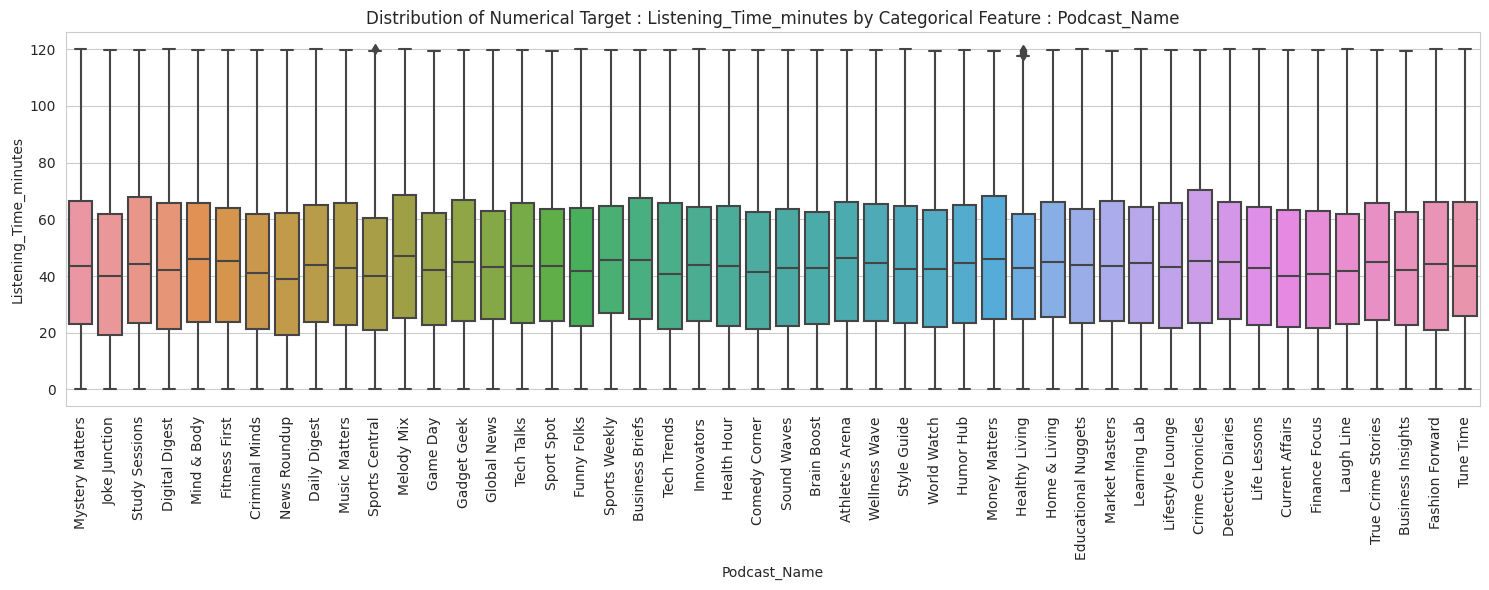

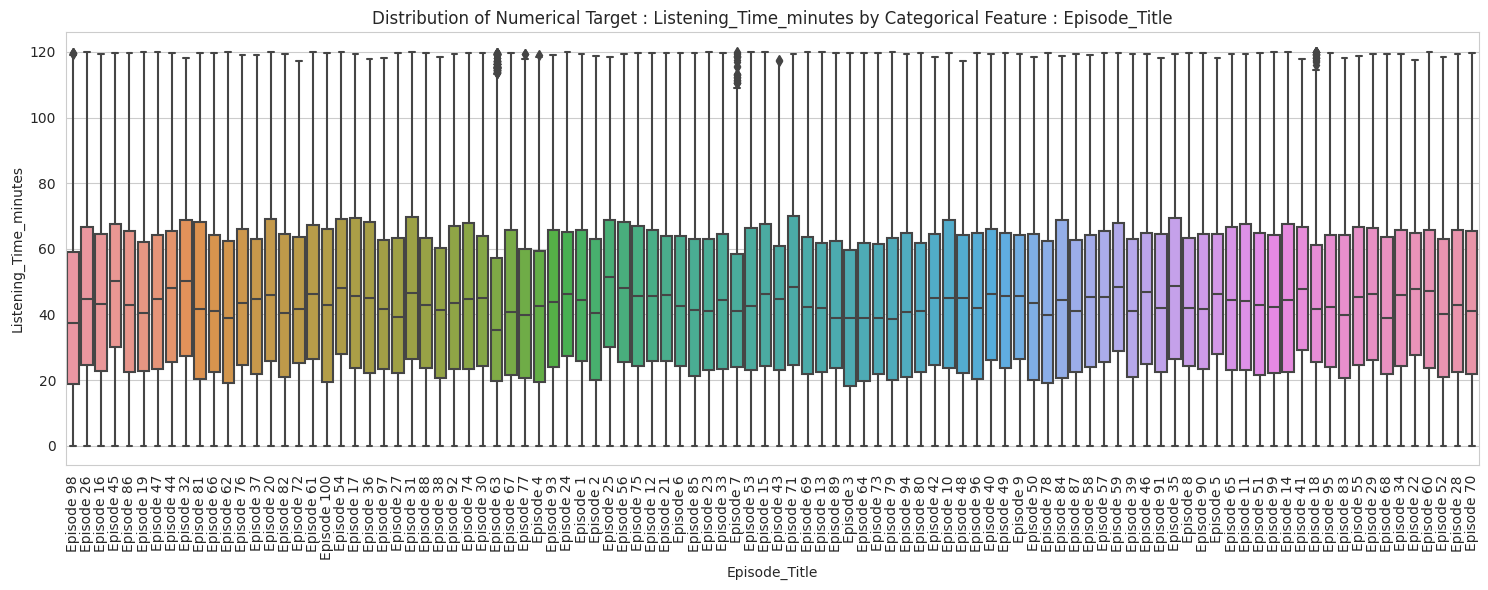

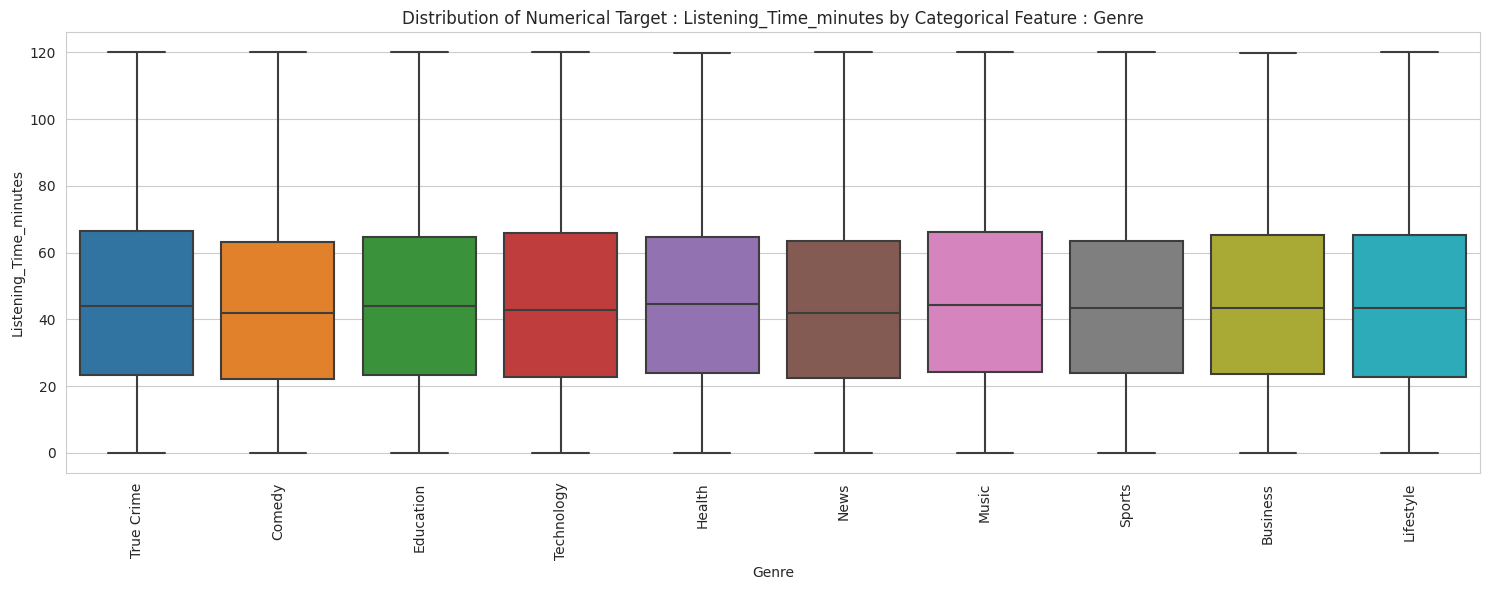

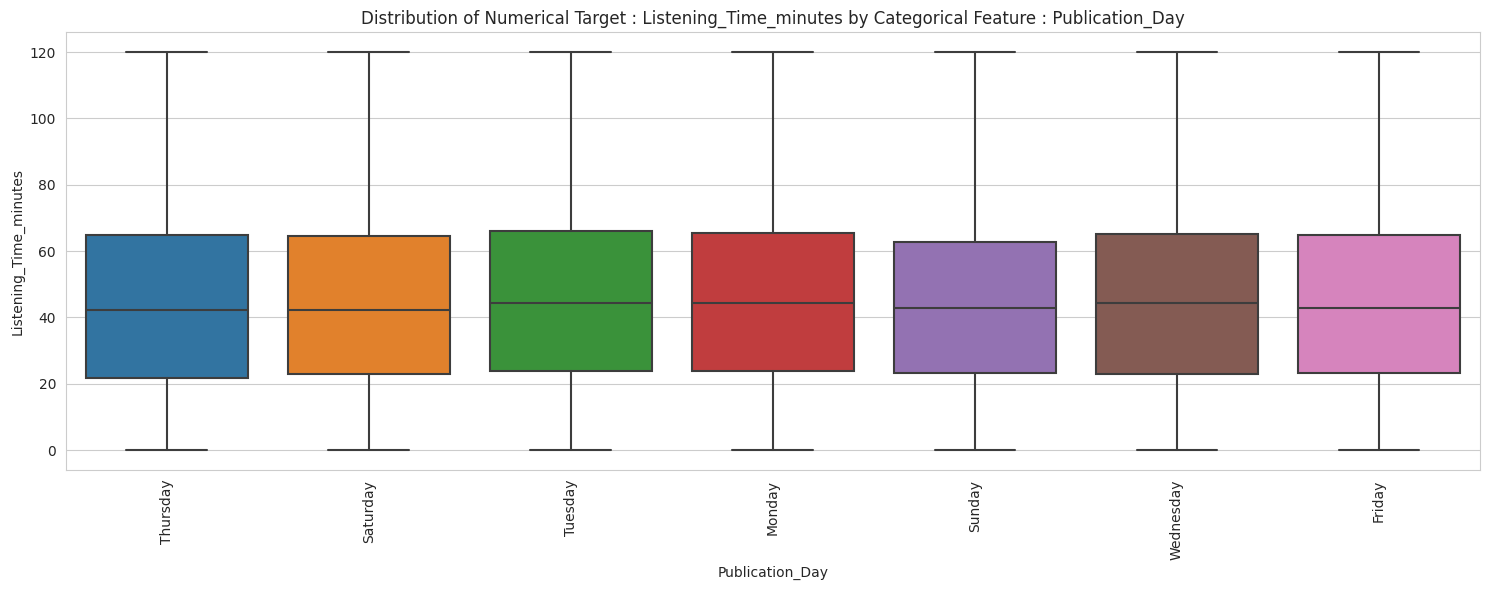

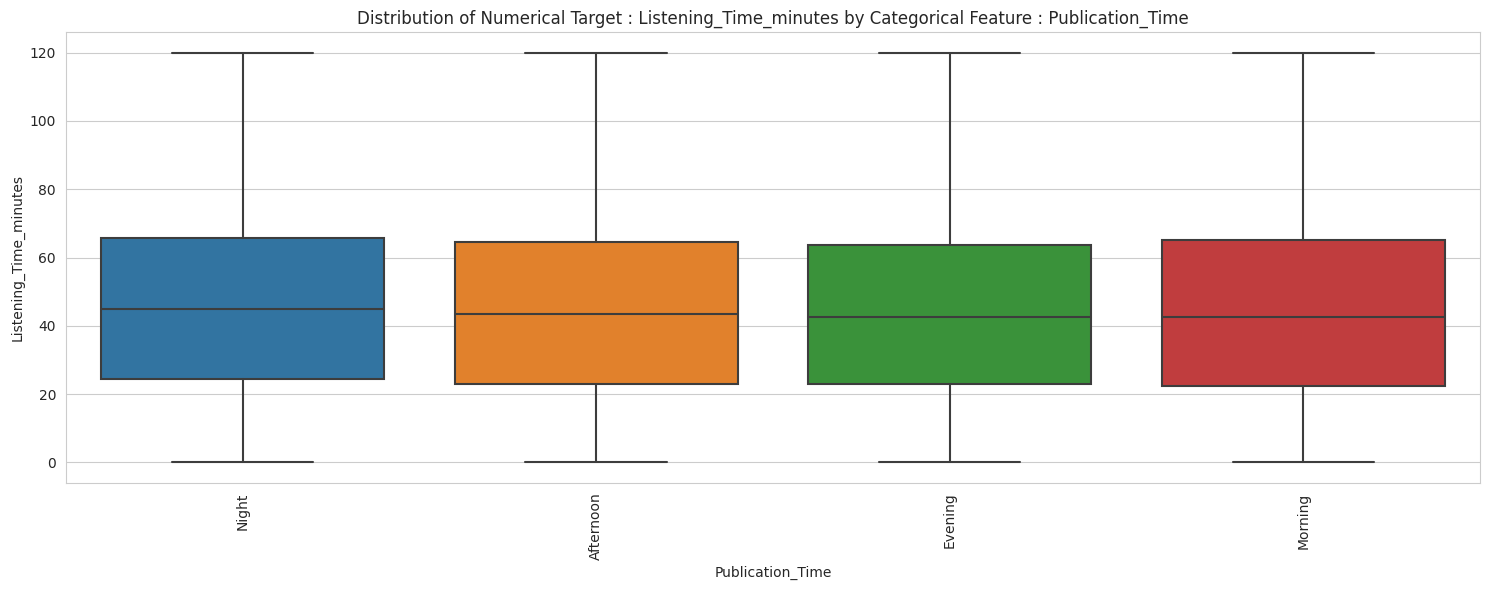

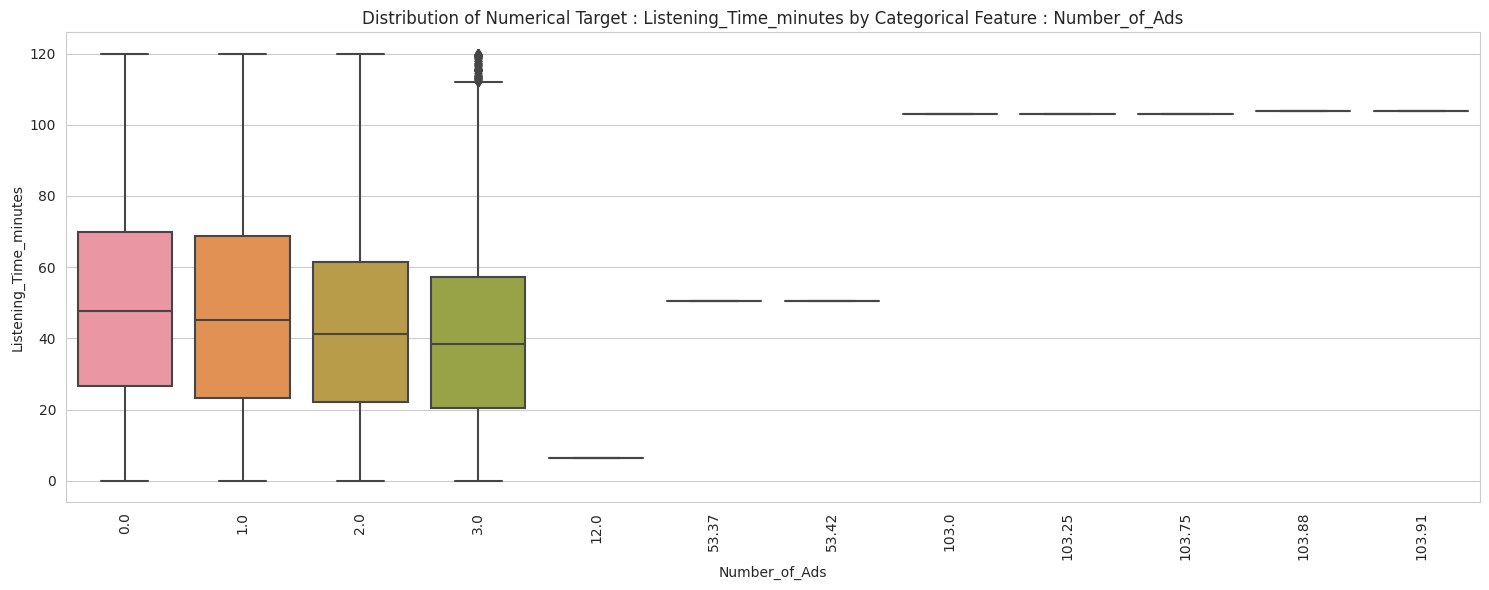

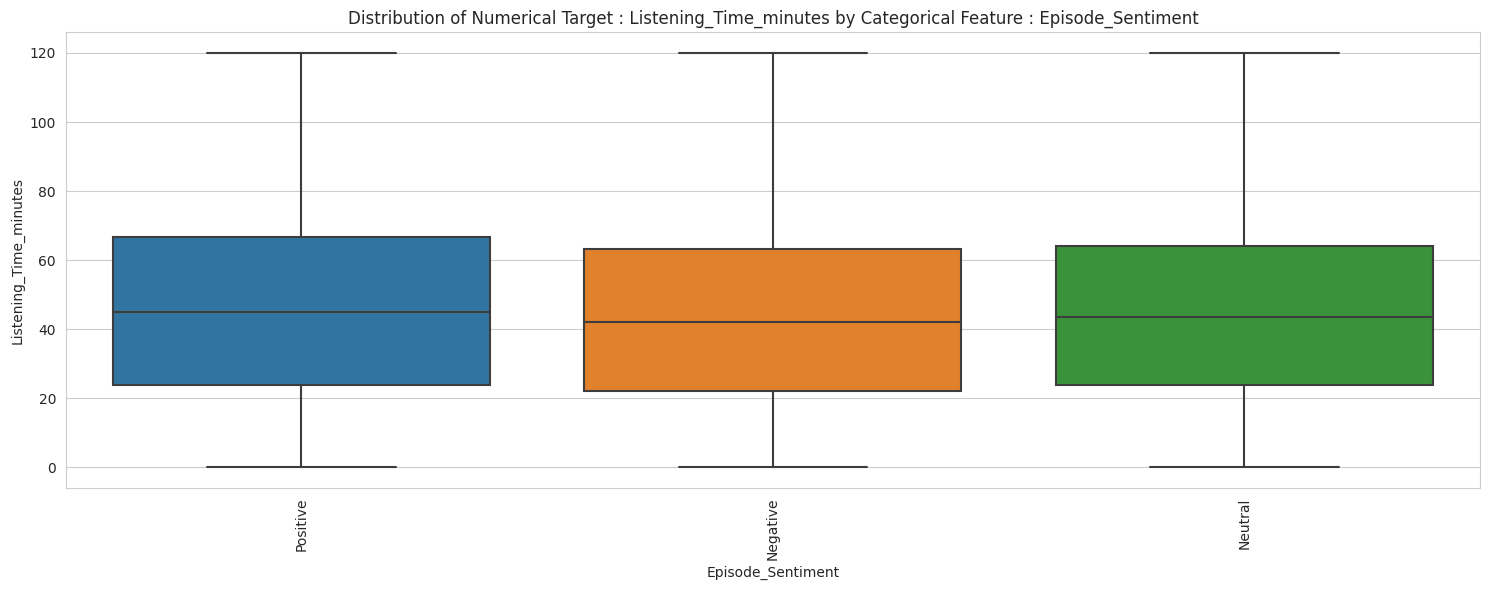

In [30]:
for col in categorial_valiable:
    plt.figure(figsize=(15, 6)) # Adjust figure size as needed
    sns.boxplot(x=col, y=target_variable, data=train_data)
    plt.title(f'Distribution of Numerical Target : {target_variable} by Categorical Feature : {col}')
    plt.xticks(rotation=90) # Rotate labels if they overlap
    plt.tight_layout()
    plt.show()

In [31]:
train_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

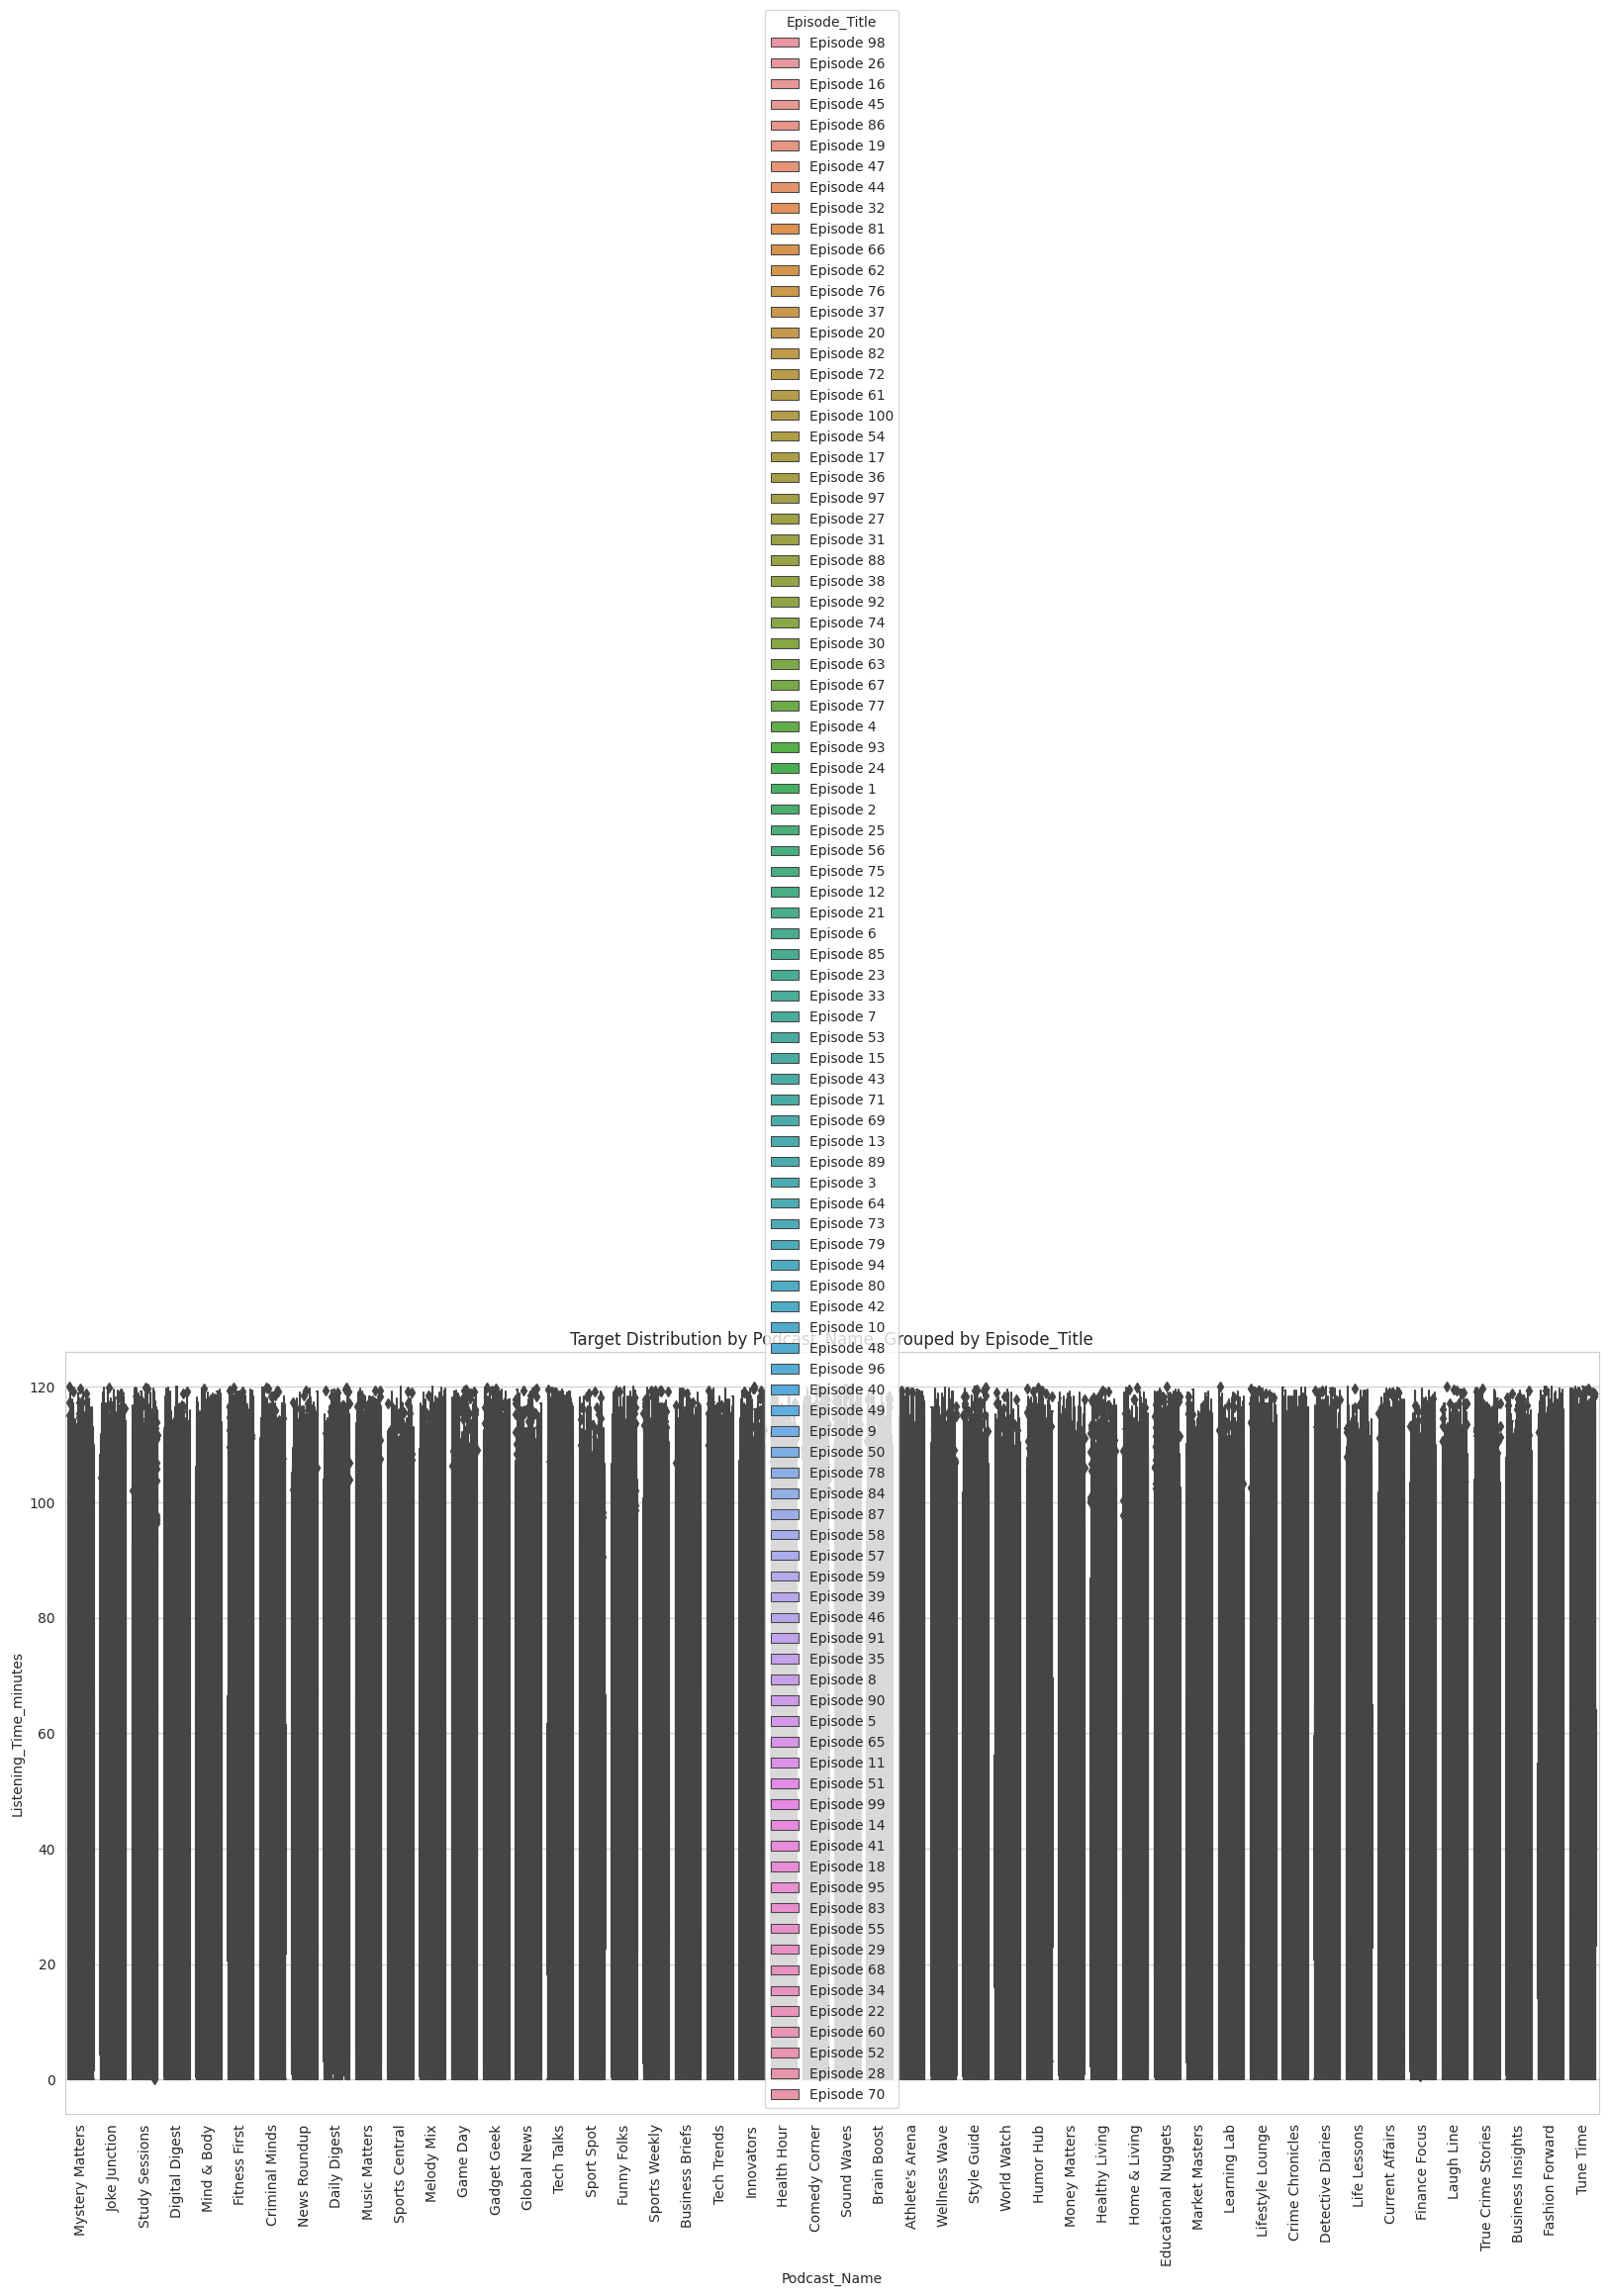

In [32]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Podcast_Name', y='Listening_Time_minutes', hue='Episode_Title', data=train_data)
plt.title('Target Distribution by Podcast_Name, Grouped by Episode_Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

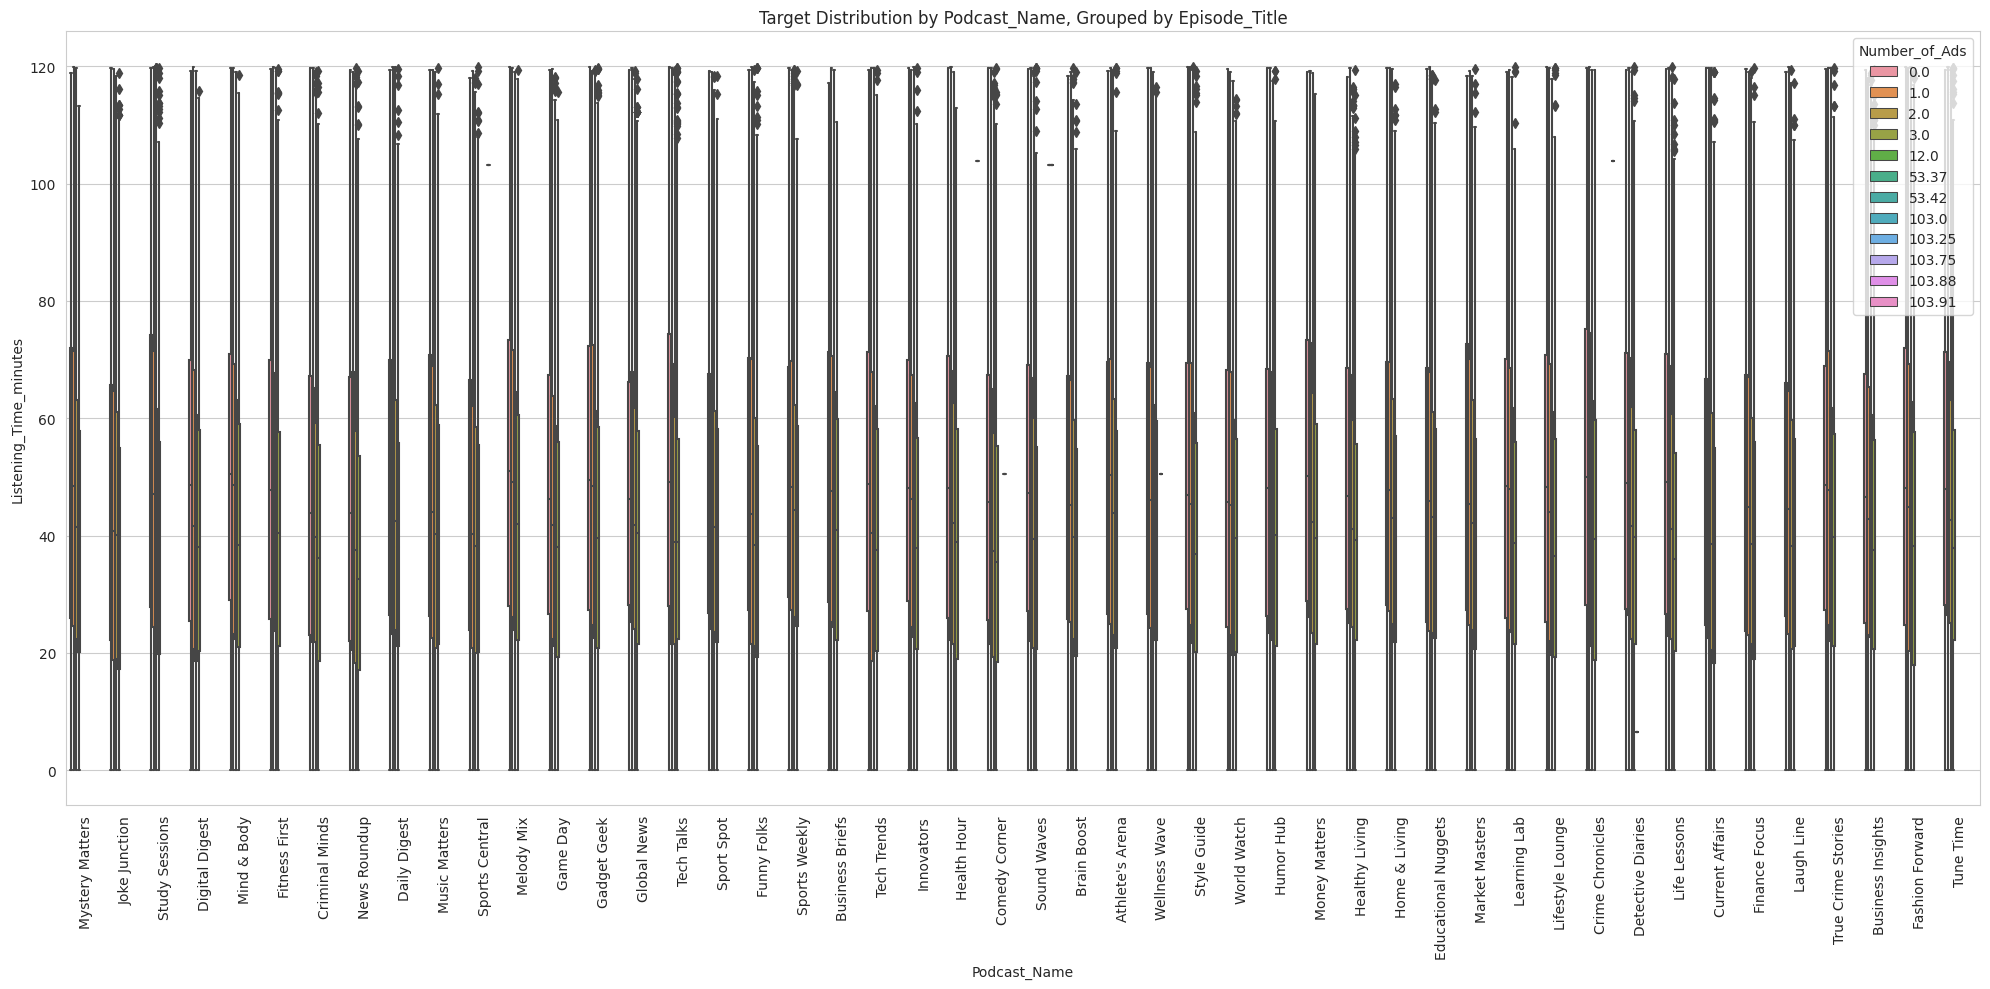

In [33]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Podcast_Name', y='Listening_Time_minutes', hue='Number_of_Ads', data=train_data)
plt.title('Target Distribution by Podcast_Name, Grouped by Episode_Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

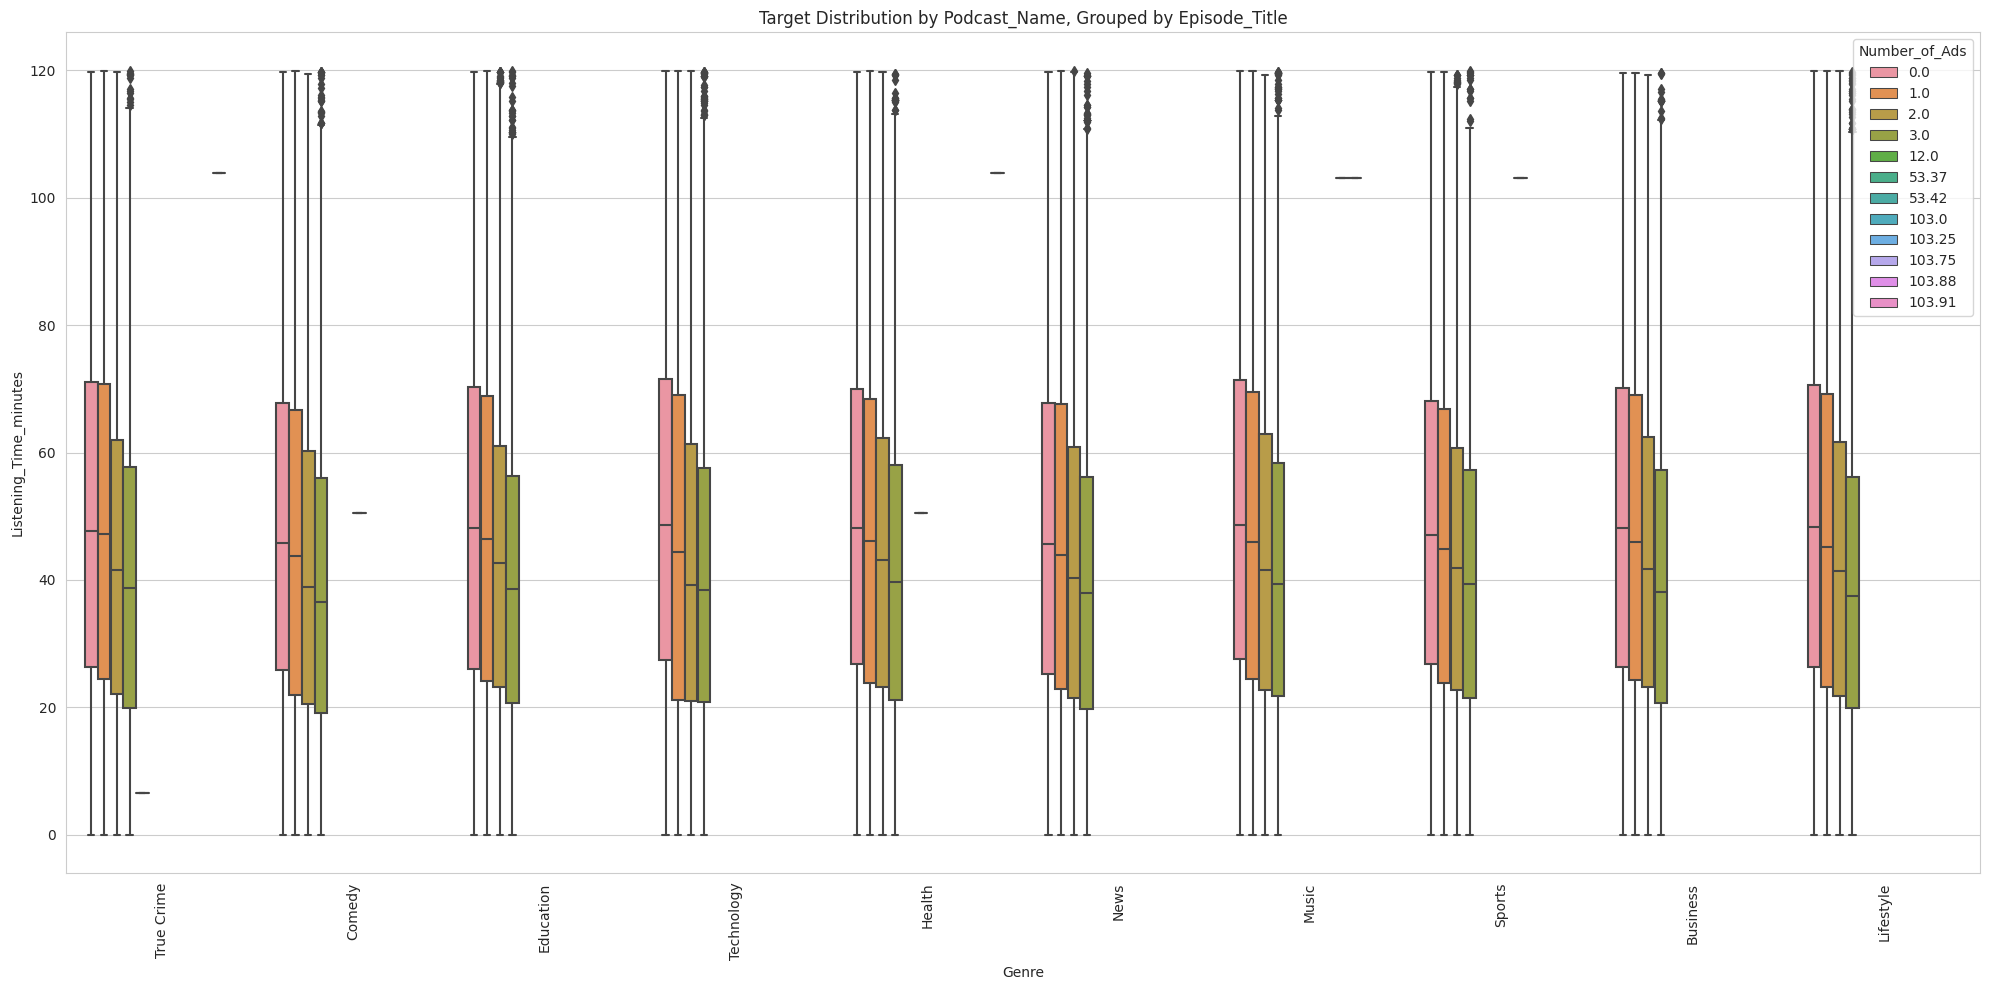

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Genre', y='Listening_Time_minutes', hue='Number_of_Ads', data=train_data)
plt.title('Target Distribution by Podcast_Name, Grouped by Episode_Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()